### Book by Chollet, Deep Learning with Python 

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.4'

# A first look at a neural network

This notebook contains the code samples found in Chapter 2, Section 1 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff). 

----

classify hand-written digits. 

The problem we are trying to solve here is to <font color="red">classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9)</font>. 

The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. 

It's <font color="red">a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST)</font> in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. 

As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

* <font color="red">A class</font>: a category in a classification problem. Now {0, 1, 2, ..., 9} 
* <font color="red">Samples</font>: Data points. Now 0, 2, 4, 3   
* <font color="red">A label</font>: The class associated with a specific sample. Now 0, 2, 4, 3

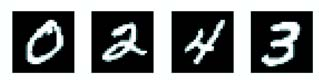

In [2]:
from IPython.display import Image
Image(filename='05-Chollet-MNIST-sample.jpg')

The MNIST dataset comes pre-loaded in Keras, in the form of <font color="red">a set of four Numpy arrays</font>:

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


* `train_images` and `train_labels` form the "training set", the data that the model will learn from.
* The model will then be tested on the "test set", `test_images` and `test_labels`. 
* Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9. 
* There is a one-to-one correspondence between the images and the labels.
* Let's have a look at the training data:

In [19]:
train_images.shape, train_images.dtype

((60000, 28, 28), dtype('uint8'))

# Data representations for neural networks

* We started from data stored in multidimensional Numpy arrays, also called tensors.
* A tensor is a container for data -- almost always numerical data.
* A tensor is defined by three key attributes: <br>
    1. Number of axes: A 3D tensor has three axes, and a matrix has two axes. This is also called the tensor’s ndim in Python libraries such as Numpy
    2. Shape—This is a tuple of integers that describes how many dimensions the tensor has along each axis.
    3. Data type (usually called dtype in Python libraries)—This is the type of the data contained in the tensor; for instance, a tensor’s type could be float32, uint8, float64, and so on.

### The first image 

In [21]:
train_labels[0]

5

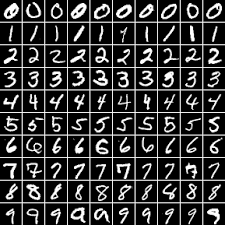

In [10]:
from IPython.display import Image
Image(filename='05-MNIST.png')
# https://www.google.com.tw/search?q=mnist+5+example&safe=strict&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjj35TfzPzaAhVFF5QKHQDQBQQQ_AUICigB&biw=1242&bih=535#imgdii=eDz5NFA-o0FzdM:&imgrc=DDeyErCS8Yf-MM:

* 0 是黑色，255 是白色 
* 8 位元，2^8 = 256

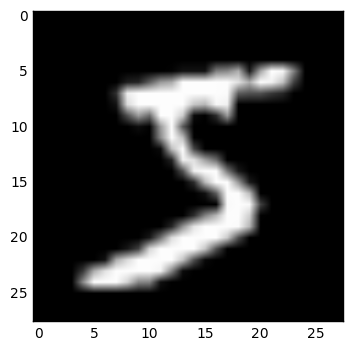

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(train_images[0,:,:], cmap = plt.cm.gray) 
plt.show()

In [9]:
train_images[0] # Look at the top and bottom rows 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Let's have a look at the test data:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our workflow will be as follow: 
* first we will present our neural network with the training data, `train_images` and `train_labels`.
* The network will then learn to associate images and labels. 
* Finally, we will ask the network to produce predictions for `test_images`, and we will verify if these predictions match the labels from `test_labels`.

In [23]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

* The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. 
* Precisely, layers extract _representations_ out of the data fed into them -- hopefully representations that are more meaningful for the problem at hand. 
* Most of deep learning really consists of chaining together simple layers which will implement a form of progressive "data distillation". 
* A deep learning model is like a sieve for data processing, made of a  succession of increasingly refined data filters -- the "layers".

* Here our network consists of a sequence of two `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
* The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). 
* Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [24]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

* Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the `[0, 1]` interval. 
* Previously, our training images for instance were stored in an array of shape `(60000, 28, 28)` of type `uint8` with  values in the `[0, 255]` interval. 
* We transform it into a `float32` array of shape `(60000, 28 * 28)` with values between 0 and 1.

In [25]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [26]:
train_images.shape

(60000, 784)

In [27]:
train_images[0,:].max(), train_images[0,:].min()

(1.0, 0.0)

We also need to categorically encode the labels:

In [28]:
from keras.utils import to_categorical

train_labels_categ = to_categorical(train_labels)
test_labels_categ = to_categorical(test_labels)

In [34]:
train_labels[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [35]:
train_labels_categ[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [30]:
network.fit(train_images, train_labels_categ, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.2567 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 9s 146us/step - loss: 0.1042 - acc: 0.9695
Epoch 3/5
60000/60000 [==============================] - 9s 149us/step - loss: 0.0693 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 9s 142us/step - loss: 0.0494 - acc: 0.9852
Epoch 5/5
60000/60000 [==============================] - 9s 148us/step - loss: 0.0378 - acc: 0.9886


In [2]:
9 / 60000

0.00015

In [23]:
9 / (60000//128 + 1)

0.019189765458422176

* A microsecond is an SI unit of time equal to one millionth (0.000001 or 10−6 or 1/1,000,000) of a second. Its symbol is μs.


### google fit keras 
* https://keras.io/models/sequential/
* batch_size: Integer or None. Number of samples per gradient update. If unspecified, it will default to 32.
* epochs: Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.
* Right now 

In [20]:
len(train_labels), ( 60000  // 128 + 1)*5 # gradient updates 

(60000, 2345)

Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [31]:
test_loss, test_acc = network.evaluate(test_images, test_labels_categ)

10000/10000 [==============================] - 1s 98us/step


In [32]:
print('test_acc:', test_acc)

test_acc: 0.9803


* Our test set accuracy turns out to be 98% -- that's quite a bit lower than the training set accuracy. 
* This gap between training accuracy and test accuracy is an example of "overfitting", the fact that machine learning models tend to perform worse on new data than on their training data. 
* Overfitting will be a central topic in chapter 3.